<a href="https://colab.research.google.com/github/retuyu88/digitalentkominfo/blob/master/Copy_of_%5B27_4%5D_CNN_CIFAR_10_Augmented_ADF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://i.imgur.com/UjutVJd.jpg" align = "center">

---
# Dataset CIFAR-10


Jangan lupa, pastikan Colab ini berjalan dengan GPU


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(precision=7)

---
## Load Dataset CIFAR-10





In [2]:
import tensorflow as tf

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)
print('X_test.shape  =',X_test.shape)
print('y_test.shape  =',y_test.shape)

X_train.shape = (50000, 32, 32, 3)
y_train.shape = (50000, 1)
X_test.shape  = (10000, 32, 32, 3)
y_test.shape  = (10000, 1)


---
## Visualisasi Data CIFAR-10


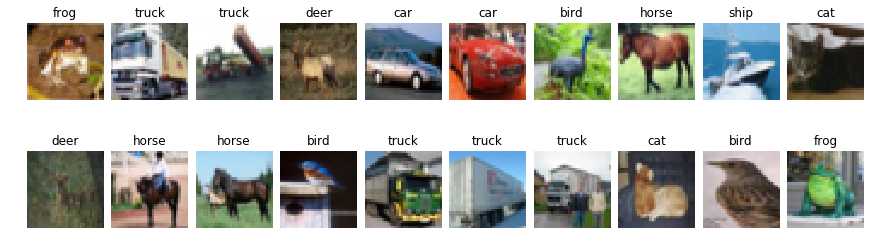

In [3]:
fig, ax = plt.subplots(2,10,figsize=(15,4.5))
fig.subplots_adjust(hspace=0.1, wspace=0.1)
for j in range(0,2):
    for i in range(0, 10):
        ax[j,i].imshow(X_train[i+j*10])
        ax[j,i].set_title(classes[y_train[i+j*10,0]])
        ax[j,i].axis('off')
plt.show()

---
## Bagi Data Validasi
Ambil 10,000 data terakhir dari data latih menjadi data Validasi di dalam matrix `X_val` dan `y_val`

In [4]:
X_val = X_train[-10000:,:]
y_val = y_train[-10000:]

X_train = X_train[:-10000, :]
y_train = y_train[:-10000]

print('X_val.shape   =',X_val.shape)
print('y_val.shape   =',y_val.shape)
print('X_train.shape =',X_train.shape)
print('y_train.shape =',y_train.shape)

X_val.shape   = (10000, 32, 32, 3)
y_val.shape   = (10000, 1)
X_train.shape = (40000, 32, 32, 3)
y_train.shape = (40000, 1)


---
## Normalizing Data

In [5]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

mean_image = np.mean(X_train, axis = 0)
X_train /= 255
X_val /= 255
X_test /= 255

print('X_train.shape =',X_train.shape)
print('X_val.shape   =',X_val.shape)
print('X_test.shape  =',X_test.shape)


X_train.shape = (40000, 32, 32, 3)
X_val.shape   = (10000, 32, 32, 3)
X_test.shape  = (10000, 32, 32, 3)


---
## One Hot Matrix



 Ubah vektor target `y_train`, `y_val`, dan `y_test` menjadi bentuk One-Hot Matrix

In [6]:
from tensorflow.keras.utils import to_categorical

y_train_hot = to_categorical(y_train.ravel(), 10)
y_val_hot = to_categorical(y_val.ravel(), 10)
y_test_hot = to_categorical(y_test.ravel(), 10)

print('y_train_hot.shape =',y_train_hot.shape)
print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (40000, 10)
y_val_hot.shape   = (10000, 10)
y_test_hot.shape  = (10000, 10)


---

# Three-Layer Convolutional Neural Network
Sebagai perbandingan, mari kita bangun Convolutional Neural Network yang juga hanya 3 layer


---
## Import Modul



In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

num_data    = X_train.shape[0]
X_dim       = X_train.shape[1]
num_classes = y_train_hot.shape[1]

---
## Model Neural Network


In [0]:
# create model compact sequential
def create_model():
  model = Sequential([
    Conv2D(64,(3,3),input_shape=(32,32,3), padding='same', activation="relu"),
    Conv2D(32,(3,3), padding='same', activation="relu"),
    MaxPooling2D(),
    Conv2D(32,(3,3), padding='same', activation="relu"),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation="relu"),
    Dense(num_classes, activation="softmax")
  ])
  return model


---
# Pelatihan Tanpa Data Augmentasi

In [10]:
model_cnn = create_model()

model_cnn.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


num_epochs = 15
batch_size = 500

hist_cnn = model_cnn.fit(X_train, y_train_hot, 
          validation_data=(X_val, y_val_hot),
          epochs=num_epochs, batch_size=batch_size, 
          verbose=2)

W0806 03:38:11.901312 140530014345088 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 - 6s - loss: 1.7403 - acc: 0.3788 - val_loss: 1.4592 - val_acc: 0.4778
Epoch 2/15
40000/40000 - 4s - loss: 1.3439 - acc: 0.5201 - val_loss: 1.3099 - val_acc: 0.5408
Epoch 3/15
40000/40000 - 4s - loss: 1.1857 - acc: 0.5810 - val_loss: 1.1356 - val_acc: 0.6064
Epoch 4/15
40000/40000 - 4s - loss: 1.0615 - acc: 0.6288 - val_loss: 1.0987 - val_acc: 0.6133
Epoch 5/15
40000/40000 - 4s - loss: 0.9703 - acc: 0.6620 - val_loss: 1.0054 - val_acc: 0.6527
Epoch 6/15
40000/40000 - 4s - loss: 0.9064 - acc: 0.6851 - val_loss: 0.9491 - val_acc: 0.6732
Epoch 7/15
40000/40000 - 4s - loss: 0.8258 - acc: 0.7134 - val_loss: 0.9327 - val_acc: 0.6772
Epoch 8/15
40000/40000 - 4s - loss: 0.7734 - acc: 0.7309 - val_loss: 0.9197 - val_acc: 0.6860
Epoch 9/15
40000/40000 - 4s - loss: 0.7202 - acc: 0.7510 - val_loss: 0.8962 - val_acc: 0.6979
Epoch 10/15
40000/40000 - 4s - loss: 0.6585 - acc: 0.7727 - val_loss: 0.8938 - val_acc: 0.7003
Epoch 11/

---
## Evaluasi Model


In [11]:
scores_cnn = model_cnn.evaluate(X_test, y_test_hot, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores_cnn[1]*100))

10000/10000 [==============================] - 1s 105us/sample - loss: 0.9488 - acc: 0.7021

Model Accuracy: 70.21%


---
# Pelatihan Dengan Data Augmentasi

In [0]:
model_cnn_aug = create_model()

model_cnn_aug.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


num_epochs = 15
batch_size = 500


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    samplewise_center=False,
    featurewise_center=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False)

In [0]:
datagen.fit(X_train)

In [28]:
hist_cnn_aug = model_cnn_aug.fit_generator(
    datagen.flow(
        X_train, y_train_hot, batch_size=batch_size
    ),
    validation_data=(X_val, y_val_hot),
    epochs=num_epochs,
    verbose=2)

Epoch 1/15
80/80 - 15s - loss: 0.6343 - acc: 0.7801 - val_loss: 2.0968 - val_acc: 0.3966
Epoch 2/15
80/80 - 15s - loss: 0.6061 - acc: 0.7880 - val_loss: 2.2867 - val_acc: 0.3823
Epoch 3/15
80/80 - 15s - loss: 0.5840 - acc: 0.7969 - val_loss: 2.5971 - val_acc: 0.3496
Epoch 4/15
80/80 - 14s - loss: 0.5722 - acc: 0.7976 - val_loss: 2.0919 - val_acc: 0.3874
Epoch 5/15
80/80 - 15s - loss: 0.5494 - acc: 0.8070 - val_loss: 2.3952 - val_acc: 0.3669
Epoch 6/15
80/80 - 15s - loss: 0.5413 - acc: 0.8102 - val_loss: 2.3609 - val_acc: 0.3823
Epoch 7/15
80/80 - 14s - loss: 0.5338 - acc: 0.8144 - val_loss: 2.4078 - val_acc: 0.3708
Epoch 8/15
80/80 - 14s - loss: 0.5155 - acc: 0.8217 - val_loss: 2.6023 - val_acc: 0.3655
Epoch 9/15
80/80 - 14s - loss: 0.5026 - acc: 0.8234 - val_loss: 2.4747 - val_acc: 0.3824
Epoch 10/15
80/80 - 14s - loss: 0.4785 - acc: 0.8334 - val_loss: 2.1728 - val_acc: 0.4107
Epoch 11/15
80/80 - 15s - loss: 0.4720 - acc: 0.8356 - val_loss: 2.2271 - val_acc: 0.3958
Epoch 12/15
80/80 -

---
## Evaluasi Model


In [30]:
scores_cnn_aug = model_cnn_aug.evaluate(X_test, y_test_hot, verbose=1)
print("\nModel Accuracy: %.2f%%" % (scores_cnn_aug[1]*100))

10000/10000 [==============================] - 1s 103us/sample - loss: 2.3115 - acc: 0.3943

Model Accuracy: 39.43%


---
# Perbandingan dengan dan tanpa Augmentasi


---
## Grafik Hasil Pelatihan

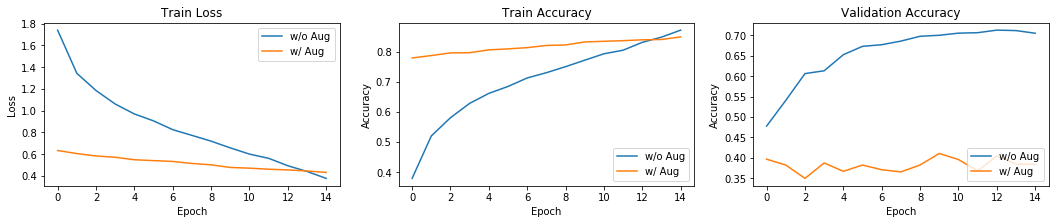

In [31]:
fig, ax = plt.subplots(1,3,figsize=(18,3))

ax[0].plot(hist_cnn.history['loss'])
ax[0].plot(hist_cnn_aug.history['loss'])
ax[0].set_title('Train Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(['w/o Aug', 'w/ Aug'], loc='upper right')

ax[1].plot(hist_cnn.history['acc'])
ax[1].plot(hist_cnn_aug.history['acc'])
ax[1].set_title('Train Accuracy')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend(['w/o Aug', 'w/ Aug'], loc='lower right')

ax[2].plot(hist_cnn.history['val_acc'])
ax[2].plot(hist_cnn_aug.history['val_acc'])
ax[2].set_title('Validation Accuracy')
ax[2].set_ylabel('Accuracy')
ax[2].set_xlabel('Epoch')
ax[2].legend(['w/o Aug', 'w/ Aug'], loc='lower right')
plt.show()

---
## Akurasi Data Uji

In [33]:
print("Akurasi Tanpa Augmentasi : %.2f%%" % (scores_cnn[1]*100))
print("Akurasi Dengan Augmentasi: %.2f%%" % (scores_cnn_aug[1]*100))

Akurasi Tanpa Augmentasi : 70.21%
Akurasi Dengan Augmentasi: 39.43%


---
## Pengecekan Overfitting

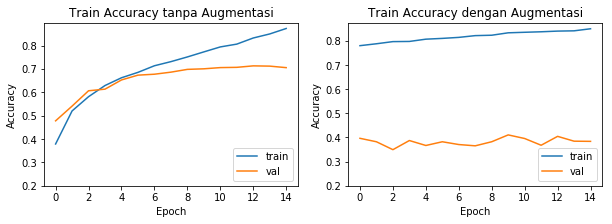

In [32]:
fig, ax = plt.subplots(1,2,figsize=(10,3))

ax[0].plot(hist_cnn.history['acc'])
ax[0].plot(hist_cnn.history['val_acc'])
ax[0].set_title('Train Accuracy tanpa Augmentasi')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylim(bottom=.2)
ax[0].legend(['train', 'val'], loc='lower right')

ax[1].plot(hist_cnn_aug.history['acc'])
ax[1].plot(hist_cnn_aug.history['val_acc'])
ax[1].set_title('Train Accuracy dengan Augmentasi')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylim(bottom=.2)
ax[1].legend(['train', 'val'], loc='lower right')
plt.show()

Makin besar gap antara akurasi training dan validasi menandakan makin rentan terhadap overfitting

---
# Kesimpulan
* Augmentasi memperbanya data dan mencegah overfitting

<p>Copyright &copy; 2019 <a href=https://www.linkedin.com/in/andityaarifianto/>ADF</a> </p>